### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
tf.random.set_seed(42)


In [3]:
tf.__version__

'2.0.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(trainX[0:1].shape)

(1, 28, 28)


In [7]:
print(trainY[0:1].shape)

(1,)


In [8]:
trainY[0]

9

In [9]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
print(trainY.shape)

(60000,)


In [11]:
trainX=trainX.astype("float32")

In [12]:
testX=testX.astype("float32")

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [13]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [14]:
trainY.shape

(60000, 10)

In [15]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
testY=tf.keras.utils.to_categorical(testY,num_classes=10)

In [17]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
testY.shape

(10000, 10)

In [19]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

Label of below image is: [9]


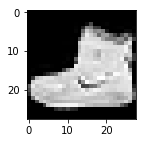

Label of below image is: [0]


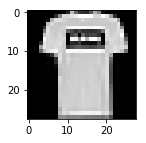

Label of below image is: [0]


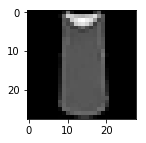

Label of below image is: [3]


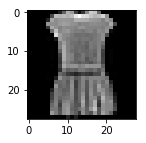

Label of below image is: [0]


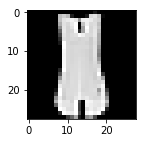

Label of below image is: [2]


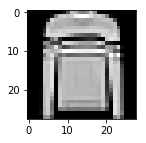

Label of below image is: [7]


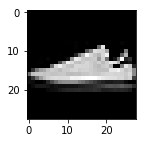

Label of below image is: [2]


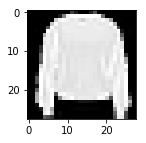

Label of below image is: [5]


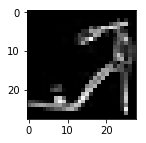

Label of below image is: [5]


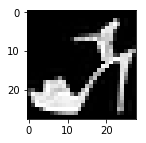

In [21]:
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.figure(figsize=(2,2))
    plt.imshow(trainX[i],cmap='gray')
    print("Label of below image is:",np.where(trainY[i]==1)[0])
    plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

Building the model with just one layer as of now and all data points

In [22]:
model = tf.keras.models.Sequential()

In [23]:
model.add(tf.keras.layers.Reshape([784],input_shape=[28,28]))

In [24]:
model.add(tf.keras.layers.BatchNormalization())

In [25]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

Compiling the Model

In [26]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Model Summary

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


Train the Model with all data points

In [ ]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100)

Train the Model with the batch size of 100 data points


In [28]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
         batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6905 - accuracy: 0.7634 - val_loss: 0.5708 - val_accuracy: 0.8065
Epoch 2/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5205 - accuracy: 0.8210 - val_loss: 0.5243 - val_accuracy: 0.8217
Epoch 3/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4873 - accuracy: 0.8334 - val_loss: 0.5059 - val_accuracy: 0.8288
Epoch 4/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4692 - accuracy: 0.8380 - val_loss: 0.4933 - val_accuracy: 0.8314
Epoch 5/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4574 - accuracy: 0.8437 - val_loss: 0.4846 - val_accuracy: 0.8340
Epoch 6/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4493 - accuracy: 0.8454 - val_loss: 0.4777 - val_accuracy: 0.8347
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3849 - accuracy: 0.8666 - val_loss: 0.4465 - val_accuracy: 0.8442
Epoch 56/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3836 - accuracy: 0.8666 - val_loss: 0.4492 - val_accuracy: 0.8416
Epoch 57/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3837 - accuracy: 0.8667 - val_loss: 0.4494 - val_accuracy: 0.8414
Epoch 58/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3836 - accuracy: 0.8657 - val_loss: 0.4480 - val_accuracy: 0.8434
Epoch 59/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3827 - accuracy: 0.8657 - val_loss: 0.4492 - val_accuracy: 0.8436
Epoch 60/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3822 - accuracy: 0.8666 - val_loss: 0.4464 - val_accuracy: 0.8431
Epoch 61/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3837 - ac

In [29]:
# Do the Prediction on first 10 test data
predicted_simple_model=model.predict(testX[0:10])

In [30]:
predicted_values_simple_model=[]
actual_values=[]

In [31]:
for i in range(0,10):
    predicted_values_simple_model.append(np.argmax(predicted_simple_model[i]))
    actual_values.append(np.argmax(testY[i]))

In [32]:
predicted_values_simple_model

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [33]:
actual_values

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

### Execute the model using model.fit()

In [ ]:
# Done in above steps

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [ ]:
# Done in above steps

### Execute the model

In [ ]:
# Done in above steps

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [34]:
model_new = tf.keras.models.Sequential()

In [35]:
model_new.add(tf.keras.layers.Reshape([784],input_shape=[28,28]))

In [36]:
model_new.add(tf.keras.layers.BatchNormalization())

In [37]:
model_new.add(tf.keras.layers.Dense(10,activation="softmax"))

In [38]:
model_new.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [39]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [40]:
model_new.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/sample - loss: 1.2796 - accuracy: 0.5617 - val_loss: 0.8680 - val_accuracy: 0.7139
Epoch 2/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.7891 - accuracy: 0.7347 - val_loss: 0.7342 - val_accuracy: 0.7564
Epoch 3/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.6954 - accuracy: 0.7653 - val_loss: 0.6754 - val_accuracy: 0.7749
Epoch 4/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6450 - accuracy: 0.7821 - val_loss: 0.6399 - val_accuracy: 0.7859
Epoch 5/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.6144 - accuracy: 0.7910 - val_loss: 0.6151 - val_accuracy: 0.7940
Epoch 6/100
60000/60000 [==============================] - 2s 25us/sample - loss: 0.5926 - accuracy: 0.7984 - val_loss: 0.5968 - val_accuracy: 0.8008
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4435 - accuracy: 0.8493 - val_loss: 0.4736 - val_accuracy: 0.8349
Epoch 56/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4428 - accuracy: 0.8490 - val_loss: 0.4734 - val_accuracy: 0.8347
Epoch 57/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4422 - accuracy: 0.8502 - val_loss: 0.4735 - val_accuracy: 0.8345
Epoch 58/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4414 - accuracy: 0.8486 - val_loss: 0.4725 - val_accuracy: 0.8341
Epoch 59/100
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4408 - accuracy: 0.8492 - val_loss: 0.4717 - val_accuracy: 0.8344
Epoch 60/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4396 - accuracy: 0.8508 - val_loss: 0.4712 - val_accuracy: 0.8349
Epoch 61/100
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4407 - ac

In [41]:
predicted_different_learning_rate=model_new.predict(testX[0:10])

In [42]:
predicted_values_diff_learning_rate=[]


In [43]:
for i in range(0,10):
    predicted_values_diff_learning_rate.append(np.argmax(predicted_different_learning_rate[i]))


In [44]:
predicted_values_diff_learning_rate

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [45]:
actual_values

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [46]:
model_multiple_layers=tf.keras.models.Sequential()

In [47]:
#Input Layer
model_multiple_layers.add(tf.keras.layers.Reshape([784],input_shape=[28,28]))

In [48]:
model_multiple_layers.add(tf.keras.layers.BatchNormalization())

In [49]:
#First Hidden Layer
model_multiple_layers.add(tf.keras.layers.Dense(100, activation="sigmoid"))

In [50]:
#Second Hidden Layer
model_multiple_layers.add(tf.keras.layers.Dense(100,activation="sigmoid"))

In [51]:
#Output Layer
model_multiple_layers.add(tf.keras.layers.Dense(10,activation="softmax"))

In [52]:
model_multiple_layers.compile(optimizer=tf.keras.optimizers.SGD(lr=0.03),\
                              loss='categorical_crossentropy', \
                              metrics=['accuracy'])

In [53]:
model_multiple_layers.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [54]:
model_multiple_layers.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 49us/sample - loss: 1.5671 - accuracy: 0.5954 - val_loss: 1.0709 - val_accuracy: 0.7122
Epoch 2/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.8767 - accuracy: 0.7345 - val_loss: 0.7545 - val_accuracy: 0.7450
Epoch 3/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6846 - accuracy: 0.7665 - val_loss: 0.6439 - val_accuracy: 0.7704
Epoch 4/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6013 - accuracy: 0.7889 - val_loss: 0.5835 - val_accuracy: 0.7893
Epoch 5/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5498 - accuracy: 0.8055 - val_loss: 0.5441 - val_accuracy: 0.8034
Epoch 6/100
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5144 - accuracy: 0.8183 - val_loss: 0.5162 - val_accuracy: 0.8153
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2700 - accuracy: 0.9031 - val_loss: 0.3391 - val_accuracy: 0.8785
Epoch 56/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2685 - accuracy: 0.9031 - val_loss: 0.3394 - val_accuracy: 0.8765
Epoch 57/100
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2664 - accuracy: 0.9045 - val_loss: 0.3375 - val_accuracy: 0.8795
Epoch 58/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2649 - accuracy: 0.9057 - val_loss: 0.3379 - val_accuracy: 0.8792
Epoch 59/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2622 - accuracy: 0.9060 - val_loss: 0.3374 - val_accuracy: 0.8794
Epoch 60/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2603 - accuracy: 0.9074 - val_loss: 0.3361 - val_accuracy: 0.8795
Epoch 61/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2603 - ac

In [55]:
predicted_multiple_layers=model_multiple_layers.predict(testX[0:10])

In [56]:
predicted_values_multiple_layers=[]

In [57]:
for i in range(0,10):
    predicted_values_multiple_layers.append(np.argmax(predicted_multiple_layers[i]))


In [58]:
predicted_values_multiple_layers

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [59]:
actual_values

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

## Review model

In [ ]:
# Done in above steps

### Run the model

In [ ]:
# Done in above steps

###### Saving the Model and Loading the Model

In [60]:
model_multiple_layers.save('mnsit_fashion.h5')

In [61]:
model_loaded = tf.keras.models.load_model('mnsit_fashion.h5')

In [62]:
model_loaded.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [63]:
predicted=model_loaded.predict(testX[0:1])

In [64]:
predicted

array([[9.4174802e-06, 1.9160372e-05, 5.3251663e-04, 2.1797228e-05,
        2.4901075e-05, 5.9326384e-03, 1.5373344e-05, 4.7152722e-03,
        4.3704294e-04, 9.8829192e-01]], dtype=float32)

In [65]:
np.argmax(predicted[0])

9

In [66]:
testY[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)